In [2]:
import pandas as pd

# Load the data from the provided files
verra_data = pd.read_excel('buffer.xlsx')

# Try reading the CSV file with a different encoding
try:
    acr_data = pd.read_csv('temp.csv', encoding='utf-8')
except UnicodeDecodeError:
    acr_data = pd.read_csv('temp.csv', encoding='latin1')

# Inspect the data
print(verra_data.head())
print(acr_data.head())


     ID                                               Name  \
0  1122                         April Salumei REDD Project   
1  1944                    Livelihoods Mount Elgon Project   
2  1389        Acapa -­ Bajo Mira Y Frontera REDD+ Project   
3   987  Reforestation of Degraded Forest Reserves in G...   
4  2497                TIST Program in Uganda, VCS-CCB 011   

   Total Buffer Contribution  Total Available Buffer  Credits Released  \
0                     277385                  243268                 0   
1                      10060                   10060                 0   
2                     122788                  122788                 0   
3                     125894                  120067              5827   
4                      56504                   56504                 0   

   Credits Cancelled  Credits on Hold      Country/Area     Methodology  
0                  0            34117  Papua New Guinea  VM0007; VM0010  
1                  0              

C:\Users\anike\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [7]:

# Standardize column names
verra_data.columns = verra_data.columns.str.lower().str.replace(' ', '_')
acr_data.columns = acr_data.columns.str.lower().str.replace(' ', '_')

# Convert relevant columns to numeric if necessary
if 'credits_released' in verra_data.columns:
    verra_data['credits_released'] = pd.to_numeric(verra_data['credits_released'], errors='coerce')
if 'total_number_of_offset_credits_registered_' in acr_data.columns:
    acr_data['total_number_of_offset_credits_registered_'] = pd.to_numeric(acr_data['total_number_of_offset_credits_registered_'], errors='coerce')

# Handle missing values by filling with 0 or an appropriate value
verra_data.fillna({'credits_released': 0}, inplace=True)
acr_data.fillna({'total_number_of_offset_credits_registered_': 0}, inplace=True)

# Ensure other necessary columns are filled
verra_data.fillna('', inplace=True)
acr_data.fillna('', inplace=True)

# Rename columns to ensure consistency
verra_data.rename(columns={'country/area': 'location', 'credits_released': 'credits_issued'}, inplace=True)
acr_data.rename(columns={'project_site_location': 'location', 'total_number_of_offset_credits_registered_': 'credits_issued'}, inplace=True)

# Add missing columns if necessary
if 'project_type' not in verra_data.columns:
    verra_data['project_type'] = verra_data['methodology'] if 'methodology' in verra_data.columns else 'Unknown Project Type'
if 'vintage' not in verra_data.columns:
    verra_data['vintage'] = ''
if 'project_type' not in acr_data.columns:
    acr_data['project_type'] = 'Unknown Project Type'
if 'vintage' not in acr_data.columns:
    acr_data['vintage'] = ''



In [8]:
# Combine the DataFrames
df = pd.concat([verra_data, acr_data], ignore_index=True)

# Handle empty project_type by replacing with 'Unknown Project Type'
df['project_type'].replace('', 'Unknown Project Type', inplace=True)

# Ensure key information is included
df = df[['project_type', 'location', 'credits_issued', 'vintage']]

# Check the combined DataFrame
print(df.head())
print(df.info())

# Verify the unique values in project_type and vintage
print(df['project_type'].unique())
print(df['vintage'].unique())

     project_type          location  credits_issued vintage
0  VM0007; VM0010  Papua New Guinea             0.0        
1          VM0017             Kenya             0.0        
2          VM0006          Colombia             0.0        
3       AR-AM0003             Ghana          5827.0        
4      AR-ACM0003            Uganda             0.0        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   project_type    1197 non-null   object 
 1   location        1197 non-null   object 
 2   credits_issued  1197 non-null   float64
 3   vintage         1197 non-null   object 
dtypes: float64(1), object(3)
memory usage: 37.5+ KB
None
['VM0007; VM0010' 'VM0017' 'VM0006' 'AR-AM0003' 'AR-ACM0003' 'VM0007'
 'AR-AMS0007' 'VM0015' 'VM0009' 'VM0010' 'VM0012' 'VM0003' 'AR-AM0014'
 'AR-ACM0001' 'VM0026' 'AR-AMS0005' 'VM0032' 'VM0033' 'VM0015; VM

In [9]:
import pandas as pd

# Group by project_type and location, then sum the credits_issued
total_credits_by_project_country = df.groupby(['project_type', 'location'])['credits_issued'].sum().reset_index()

# Display the result
print(total_credits_by_project_country)


    project_type       location  credits_issued
0     AR-ACM0001      Guatemala             0.0
1     AR-ACM0001          India             0.0
2     AR-ACM0001          Kenya             0.0
3     AR-ACM0001      Nicaragua          4318.0
4     AR-ACM0001         Uganda         13137.0
..           ...            ...             ...
825       VM0017          Kenya             0.0
826       VM0026          China             0.0
827       VM0026  United States             0.0
828       VM0032          Kenya             0.0
829       VM0033       Pakistan             0.0

[830 rows x 3 columns]


In [10]:
# Check data types of the vintage column
print(verra_data['vintage'].dtype)
print(acr_data['vintage'].dtype)

# Convert vintage to string first to inspect its content
verra_data['vintage'] = verra_data['vintage'].astype(str)
acr_data['vintage'] = acr_data['vintage'].astype(str)

# Inspect the content of the vintage column as strings
print(verra_data['vintage'].unique())
print(acr_data['vintage'].unique())


object
object
['']
['']


In [11]:
# Sort the DataFrame by credits_issued
sorted_df = df.sort_values(by='credits_issued', ascending=False)

# Find the project with the highest credit issuance
highest_credit_project = sorted_df.iloc[0]

# Find the project with the lowest credit issuance
lowest_credit_project = sorted_df.iloc[-1]

# Display the results
print("Highest Credit Issuance Project:")
print(highest_credit_project)

print("\nLowest Credit Issuance Project:")
print(lowest_credit_project)


Highest Credit Issuance Project:
project_type         Adipic Acid
location          Cantonment, FL
credits_issued        11485797.0
vintage                         
Name: 940, dtype: object

Lowest Credit Issuance Project:
project_type      Low Carbon Cement
location                    Seattle
credits_issued                  0.0
vintage                            
Name: 1196, dtype: object


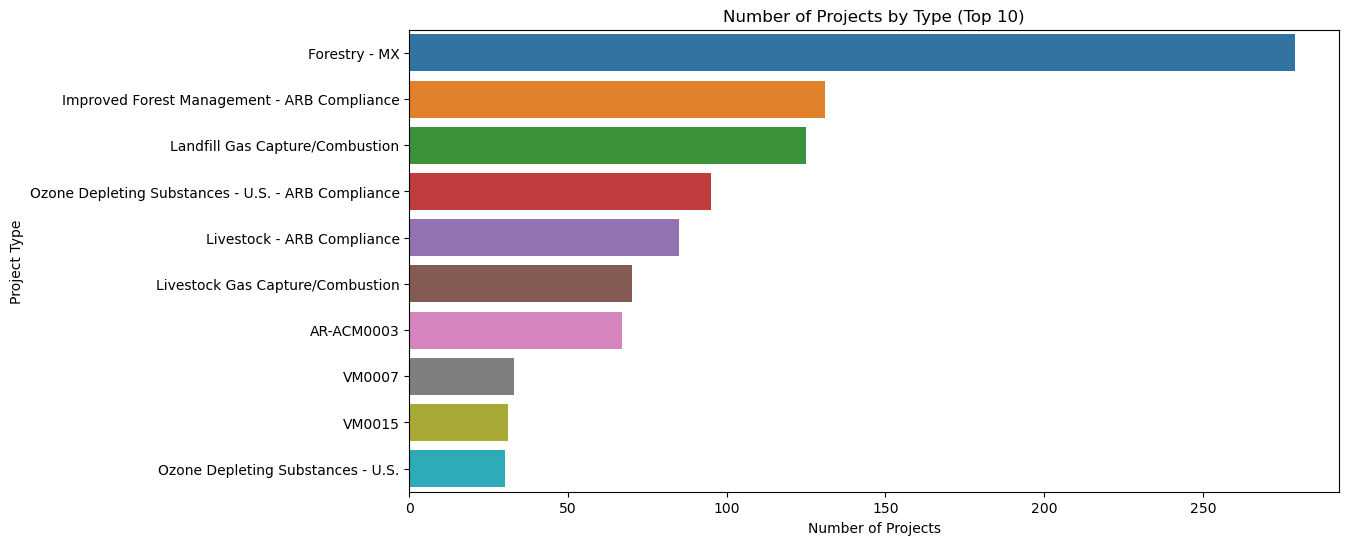

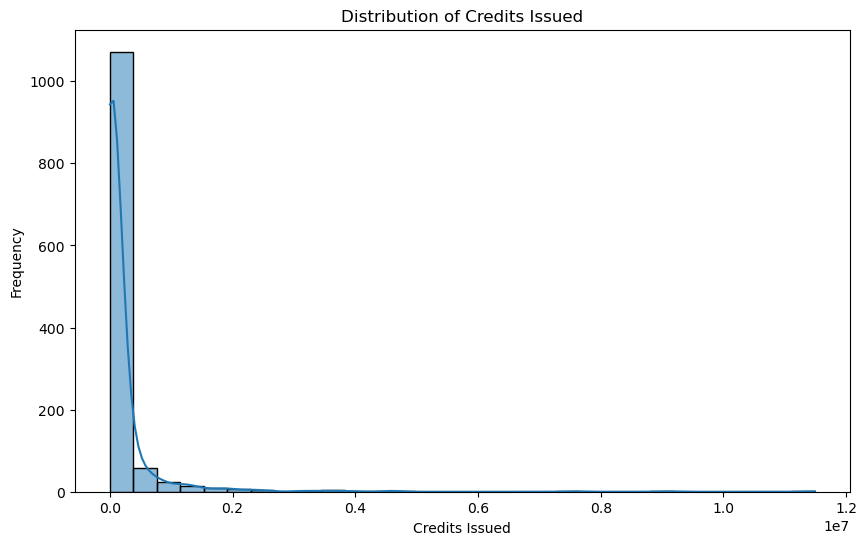

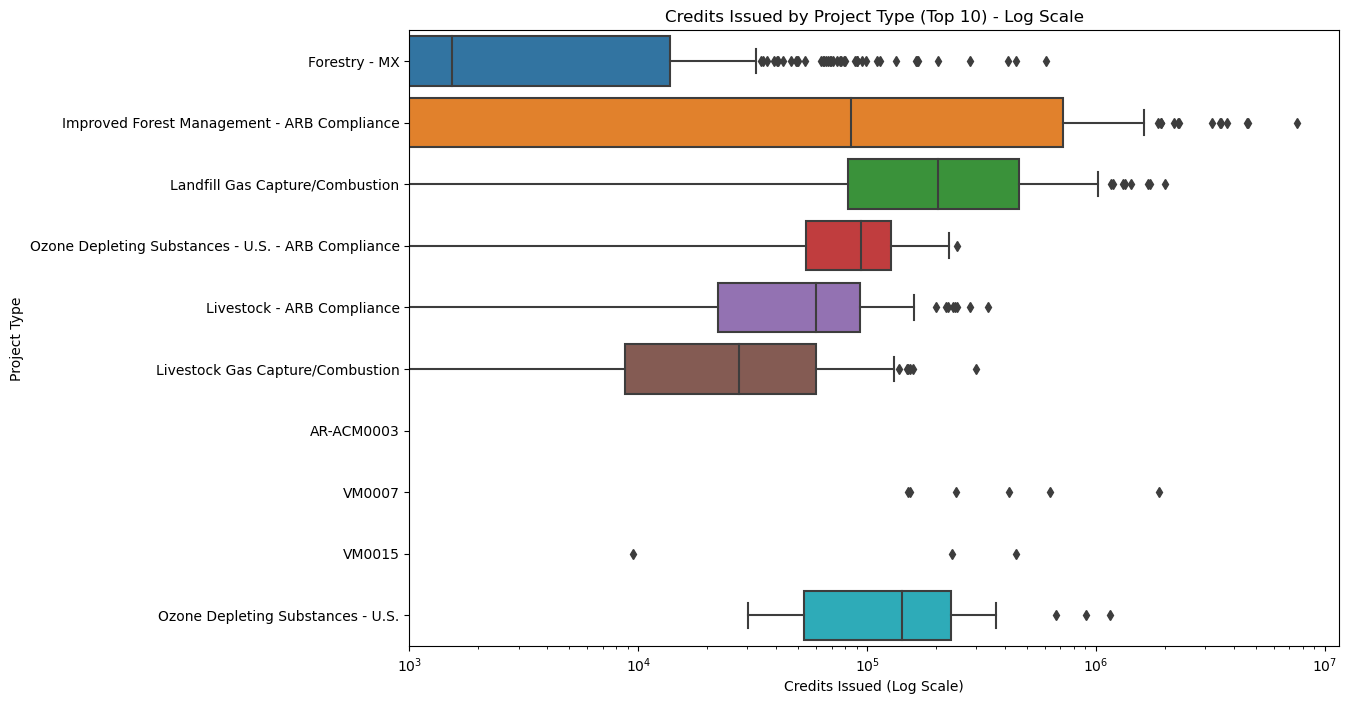

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


# Limiting to top 10 project types for Visualization 1 and 3
top_10_project_types = df['project_type'].value_counts().index[:10]
df_top_10 = df[df['project_type'].isin(top_10_project_types)]

# Visualization 1: Bar plot of projects by type (Top 10 project types)
plt.figure(figsize=(12, 6))
sns.countplot(y='project_type', data=df_top_10, order=top_10_project_types)
plt.title('Number of Projects by Type (Top 10)')
plt.xlabel('Number of Projects')
plt.ylabel('Project Type')
plt.show()

# Visualization 2: Histogram of credits issued
plt.figure(figsize=(10, 6))
sns.histplot(df['credits_issued'], bins=30, kde=True)
plt.title('Distribution of Credits Issued')
plt.xlabel('Credits Issued')
plt.ylabel('Frequency')
plt.show()

# Visualization 3: Box plot of credits issued by project type (Top 10 project types)
plt.figure(figsize=(12, 8))
sns.boxplot(x='credits_issued', y='project_type', data=df_top_10, order=top_10_project_types)
plt.xscale('log')
plt.title('Credits Issued by Project Type (Top 10) - Log Scale')
plt.xlabel('Credits Issued (Log Scale)')
plt.ylabel('Project Type')
plt.show()

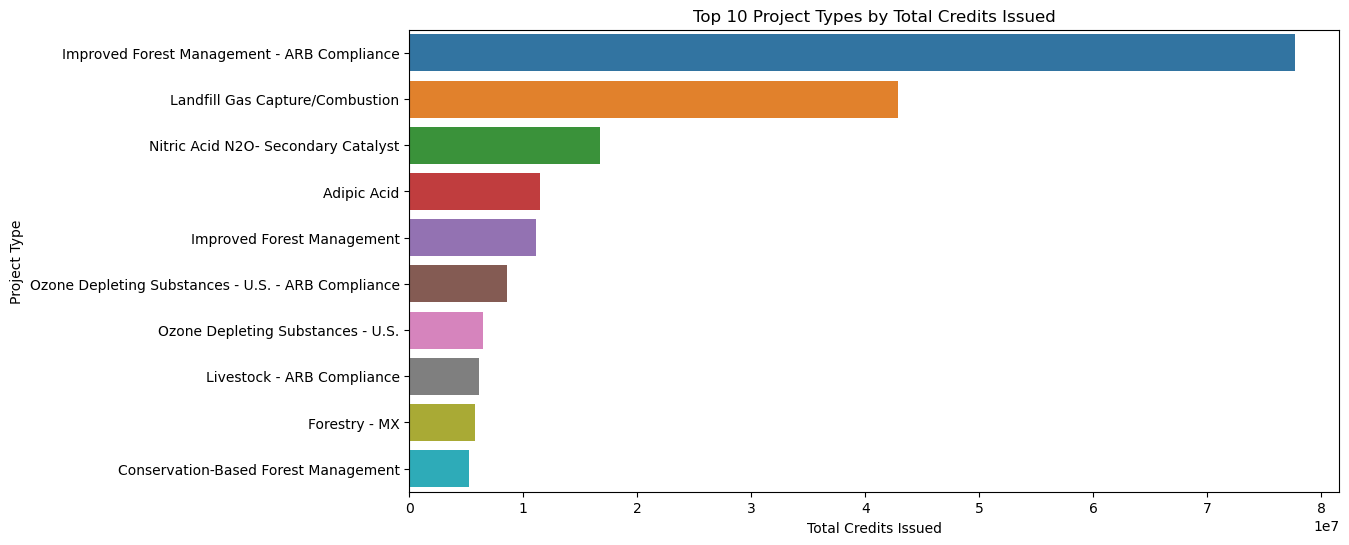

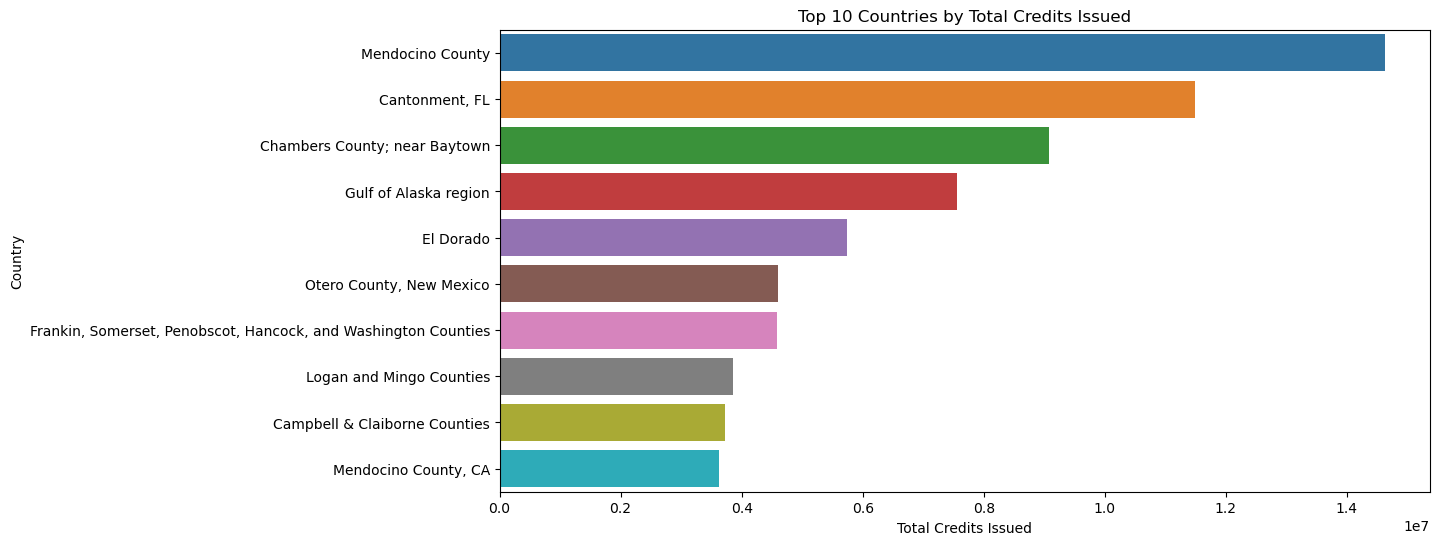

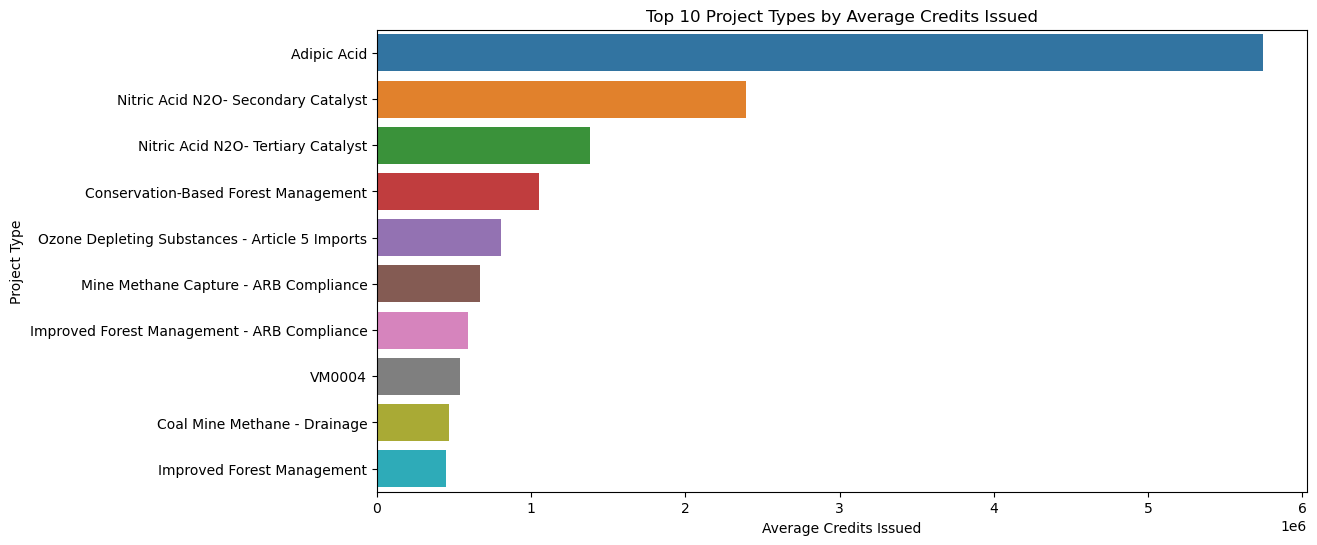

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Total credits issued by project type (Top 10)
total_credits_by_project_type = df.groupby('project_type')['credits_issued'].sum().reset_index()
total_credits_by_project_type = total_credits_by_project_type.sort_values(by='credits_issued', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='credits_issued', y='project_type', data=total_credits_by_project_type)
plt.title('Top 10 Project Types by Total Credits Issued')
plt.xlabel('Total Credits Issued')
plt.ylabel('Project Type')
plt.show()

# 2. Total credits issued by country (Top 10)
total_credits_by_country = df.groupby('location')['credits_issued'].sum().reset_index()
total_credits_by_country = total_credits_by_country.sort_values(by='credits_issued', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='credits_issued', y='location', data=total_credits_by_country)
plt.title('Top 10 Countries by Total Credits Issued')
plt.xlabel('Total Credits Issued')
plt.ylabel('Country')
plt.show()

# 3. Average credits issued per project type (Top 10 project types)
average_credits_by_project_type = df.groupby('project_type')['credits_issued'].mean().reset_index()
average_credits_by_project_type = average_credits_by_project_type.sort_values(by='credits_issued', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='credits_issued', y='project_type', data=average_credits_by_project_type)
plt.title('Top 10 Project Types by Average Credits Issued')
plt.xlabel('Average Credits Issued')
plt.ylabel('Project Type')
plt.show()
